# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


## Цель исследования:
1. Определить рыночную стоимость объектов недвижимости.
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.
3. Установить, какие факторы влияют на ценообразование стоимости квартир.

## Ход исследования:
Я проверю данные на ошибки и оценю их влияние на исследование. Затем на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского анализа.

Таким образом мое исследование пройдет в 7 этапов:

1. Обзор данных 
2. Предобработка данных 
3. Расчеты и добавление результатов в таблицу
4. Проведение анализа для Лен. области
5. Проведение анализа для Санкт-Петербурга
6. Различаются ли факторы, которые влияют на ценообразования стоимости квартир
7. Написание общего вывода.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings #импортируем библиотеку

warnings.filterwarnings('ignore') # отключаем предупреждения

pd.options.display.float_format = '{:.2f}'.format #Число знаков после точки

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

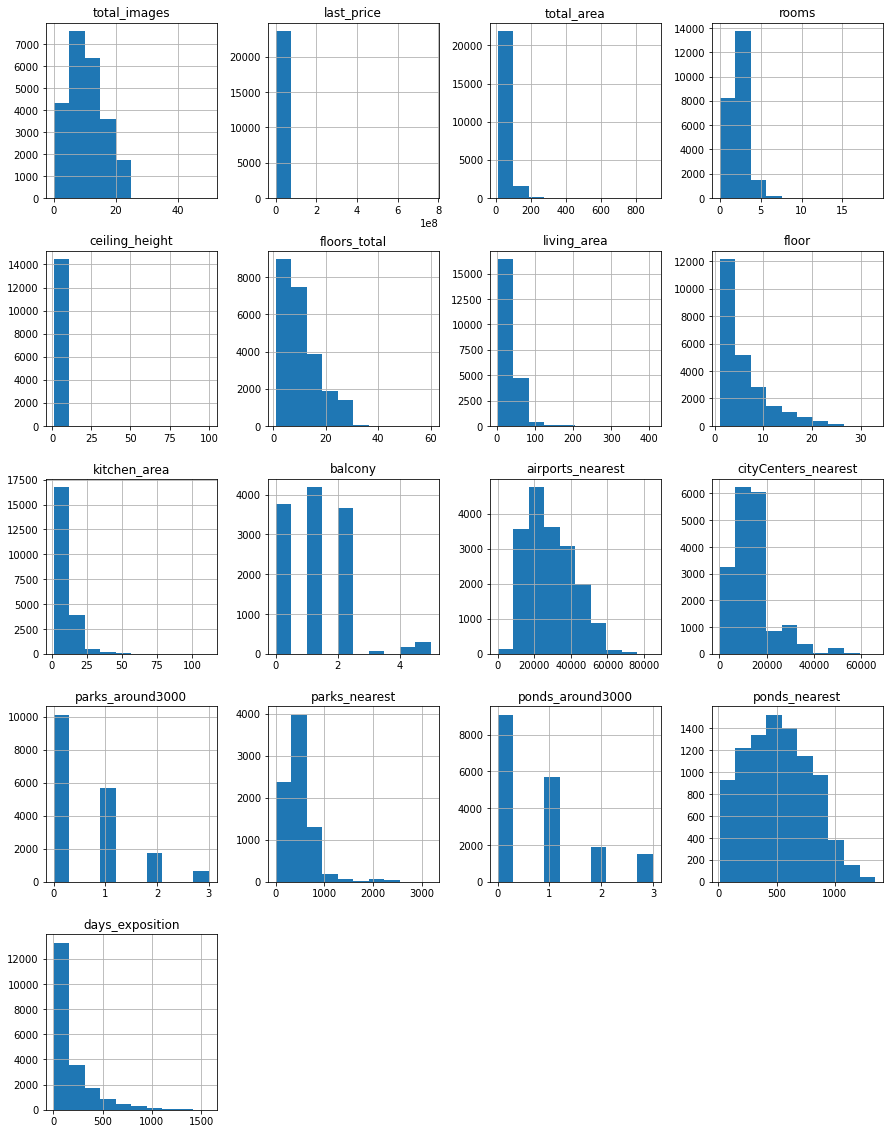

In [4]:
data.hist(figsize=(15, 20))
plt.show();

Открыл файл с данными. С помощью "\t" привел данные к табличному формату. С помощью метода info() узнал данные о таблице. Построил общую гистограмму для всех числовых столбцов таблицы.

### Предобработка данных

In [5]:
data.isnull().sum()

#Вывел количество пропущенных значений для каждого столбца,использывав комбинацию двух методов.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# Приводим к типу даты дату публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#заменяем пропуски аппартаментов на False,так как можно предположить, что это не апартаменты.
#Люди могут просто не заполнять это поле.
data['is_apartment'] = data['is_apartment'].fillna(value=False)

# Заменяем на 0 записи, где отсутствует локация,этажность,балконы,парки,пруды
data['balcony'] = data['balcony'].fillna(0)
data['locality_name'] = data['locality_name'].fillna(value='no_name')
data['floors_total'] = data['floors_total'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

# Приводим этажность,балконы,парки,пруды и цену квартир к целочисленному типу,так как эти данные могут быть только цельным числом.
# Например не может быть 2.5 балкона или 1.7 парков.
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['last_price'] = data['last_price'].astype(int)

# Заменяем пустые значения жилой площади и площади кухни
living_mean = data['living_area'].mean() / data['total_area'].mean()
kitchen_mean = data['kitchen_area'].mean() / data['total_area'].mean()

data['living_area'].fillna(living_mean * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_mean * data['total_area'], inplace=True)

# высоту потолков заменяем на медиану
# они во всех квартирах примерно одинаковы, уникальность низкая
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 




In [7]:
#проверяем как изменились данные после удаления пропусков
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

 Привели дату к типу даты для удобства и корректного отражения в таблице.
 Заменили пропуски в столбце "аппартаменты" на "False",так как скорее всего люди просто не заполняли эту графу,потому что большинсвто объектов по определению ими не являются.
 В столбце "балконы" заполниил пропуски на 0, т.к. можно предположить что, в этой графе люди не указывали балконы,т.к. они попросту отсутвуют.Данные в столбцах "Этажность" и "Локация" заменили так же на 0,здесь возможно отсутсвует информация,т.к. возможно люди подумали,что это не так важно.В столбцах "число парков в радиусе 3 км","число водоёмов в радиусе 3 км" заменили пропуски на 0,здесь пропуски есть возможно потому,что люди могут не знать о водоемах и парках поблизости.


 Привели этажность,балконы,парки и пруды к целочисленному типу,так как эти данные могут быть только цельным числом.
Например не может быть 2.5 балкона или 1.7 парков.
 Привели столбец с ценой квартир к целочисленному типу,т.к. никто не продает недвижимость с копейками

In [8]:
#Проверим данные в таблице на явные дубликаты
data.duplicated().sum()

0

In [9]:
#c помощью метода str.replace() меняем все буквы "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё','е', regex=True)
#с помощью метода replace() избавились от неявных дубликатов и отсортировали для удобства.
data['locality_name'] = data['locality_name'].replace(
    ['село ', 'городской поселок ','деревня ','котеджный ','станции ',
     'садовое товарищество ','поселок ','городского типа'], '', regex=True)
list(data['locality_name'].sort_values(ascending=False).unique())

['садоводческое некоммерческое товарищество Лесная Поляна',
 'при железнодорожной Приветнинское',
 'при железнодорожной Вещево',
 'коттеджный Счастье',
 'коттеджный Лесное',
 'коттеджный Кивеннапа Север',
 'Янино-1',
 'Ям-Тесово',
 'Яльгелево',
 'Ялгино',
 'Юкки',
 'Щеглово',
 'Шушары',
 'Шум',
 'Шугозеро',
 'Шпаньково',
 'Шлиссельбург',
 'Чудской Бор',
 'Цвылево',
 'Цвелодубово',
 'Хязельки',
 'Хапо-Ое',
 'Форт Красная Горка',
 'Федоровское',
 'Фалилеево',
 'Ушаки',
 'Усть-Луга',
 'Усть-Ижора',
 'Углово',
 'Трубников Бор',
 'Тосно',
 'Торфяное',
 'Торошковичи',
 'Торосово',
 'Торковичи',
 'Тойворово',
 'Тихковицы',
 'Тихвин',
 'Тесово-4',
 'Терпилицы',
 'Терволово',
 'Тельмана',
 'Тарасово',
 'Сясьстрой',
 'Сяськелево',
 'Суходолье',
 'Суоранда',
 'Сумино',
 'Суйда',
 'Стрельна',
 'Стеклянный',
 'Старые Бегуницы',
 'Старосиверская',
 'Старополье',
 'Старое Хинколово',
 'Старая Пустошь',
 'Старая Малукса',
 'Старая Ладога',
 'Старая',
 'Сосновый Бор',
 'Сосново',
 'Совхозный',
 'Советс

In [10]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [11]:
#Аномальные значения по цене
data['last_price'].describe()

count       23699.00
mean      6541548.77
std      10887013.27
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

In [12]:
data['total_area'].sum() #общая площадь
len(data) #кол-во строк

23699

In [13]:
data_new = data.query('last_price < 100000000 and ceiling_height < 5 and ceiling_height >= 2.3 and total_area <= 1430202')
data_new['ceiling_height'].unique()
len(data_new) #кол-во строк после отсеивания аномальных значений


23611

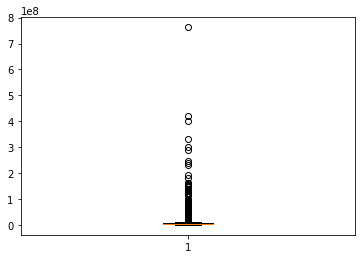

In [44]:
plt.boxplot(data['last_price'])
plt.show()

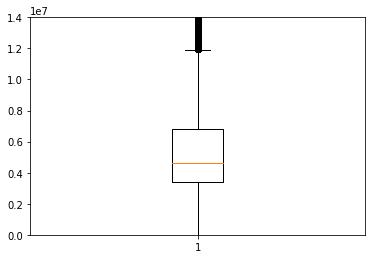

In [46]:
plt.boxplot(data['last_price'])
plt.ylim(0, 14000000)
plt.show()

# Вывод
Выполнили предобработку данных,нашли пропущенные значения и где это было возможно заменили их,привели к целочисленному типу некоторые столбцы для удобства дальнейшего анализа. 
Проверили на Явные дубликаты(их не оказалось) и не явные дубликаты,устранили их.
Отсекли аномальные значения,оставив высоту потолков не выше 5 и не ниже 2.3 метров

### Посчитайте и добавьте в таблицу новые столбцы

In [14]:
#посчитаем и добавим в таблицу: цена одного квадратного метра
data_new['price_one_m'] = data_new['last_price']/data_new['total_area']

#посчитаем и добавим в таблицу: день публикации объявления 
data_new['first_day_exposition'] = pd.to_datetime(data_new['first_day_exposition'], format='%Y-%m-%d %H:%M')
data_new['weekday'] = data_new['first_day_exposition'].dt.weekday

#посчитаем и добавим в таблицу: месяц публикации объявления
data_new['first_day_exposition'] = pd.to_datetime(data_new['first_day_exposition'], format='%Y-%m-%d %H:%M')
data_new['month'] = data_new['first_day_exposition'].dt.month

#посчитаем и добавим в таблицу: год публикации объявления
data_new['first_day_exposition'] = pd.to_datetime(data_new['first_day_exposition'], format='%Y-%m-%d %H:%M')
data_new['year'] = data_new['first_day_exposition'].dt.year




In [15]:
#добавим ф-цию для присвоения типа этажам квартир
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data_new['floor_type'] = data_new.apply(floor_type,axis=1)
data_new        

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m,weekday,month,year,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,1,482.00,2,755.00,NaN,120370.37,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,NaN,0,NaN,81.00,82920.79,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,1,90.00,2,574.00,558.00,92785.71,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.79,9,False,...,2,84.00,3,234.00,424.00,408176.10,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,2,112.00,1,48.00,121.00,100000.00,1,6,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,1,796.00,3,381.00,NaN,72490.85,1,3,2017,другой
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,...,0,NaN,0,NaN,45.00,52542.37,0,1,2018,другой
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,...,0,NaN,0,NaN,NaN,44091.71,6,2,2018,первый
23697,13,11475000,76.75,2017-03-28,2,3.00,17,43.82,12,False,...,2,173.00,3,196.00,602.00,149511.40,1,3,2017,другой


In [16]:
data_new['cityCenters_nearest']

0       16028.00
1       18603.00
2       13933.00
3        6800.00
4        8098.00
          ...   
23694    4232.00
23695        NaN
23696        NaN
23697   10364.00
23698        NaN
Name: cityCenters_nearest, Length: 23611, dtype: float64

In [17]:
#посчитаем и добавим в таблицу: расстояние в км до центра города
data_new['cityCenters_nearest_km'] = data_new['cityCenters_nearest'] / 1000
data_new['cityCenters_nearest_km'] = data_new['cityCenters_nearest_km'].fillna(0).astype(int)
data_new

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.00,2,755.00,NaN,120370.37,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,NaN,0,NaN,81.00,82920.79,1,12,2018,первый,18
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,90.00,2,574.00,558.00,92785.71,3,8,2015,другой,13
3,0,64900000,159.00,2015-07-24,3,2.65,14,90.79,9,False,...,84.00,3,234.00,424.00,408176.10,4,7,2015,другой,6
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.00,1,48.00,121.00,100000.00,1,6,2018,другой,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,796.00,3,381.00,NaN,72490.85,1,3,2017,другой,4
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.00,4,False,...,NaN,0,NaN,45.00,52542.37,0,1,2018,другой,0
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.70,1,False,...,NaN,0,NaN,NaN,44091.71,6,2,2018,первый,0
23697,13,11475000,76.75,2017-03-28,2,3.00,17,43.82,12,False,...,173.00,3,196.00,602.00,149511.40,1,3,2017,другой,10


### Проведите исследовательский анализ данных

Text(0, 0.5, 'Количество квартир')

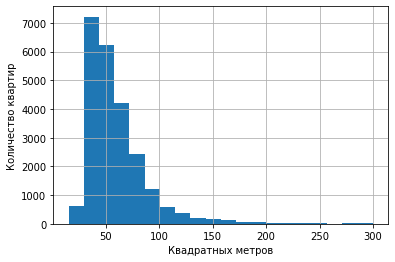

In [18]:
#постороим гистограмму общей площади квартир
data['total_area'].hist(bins=20,range=(15,300))
plt.xlabel('Квадратных метров')
plt.ylabel('Количество квартир')

Глядя на гистограмму можем сделать вывод,что наибольшее кол-во с квадратурой 30-50 квадратных метров. 
Скорее всего такие квартиры берут семьи с небольшим кол-вом людей и небольшим бюджетом

In [19]:
data_new.groupby('locality_name')['total_area'].max().sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург   590.00
Пушкин            380.00
Колпино           347.50
Красное Село      320.00
Сертолово         236.00
Хязельки          230.00
Стрельна          215.20
Сестрорецк        214.00
Парголово         201.50
Петергоф          200.00
Name: total_area, dtype: float64

Сгрупировали данные городов по общей площади с максимальным значением. Из данных видно что квартиры с самой большой площадью находятся в Санкт-Петербург, что в принципе не удивительно.

Text(0, 0.5, 'Количество квартир')

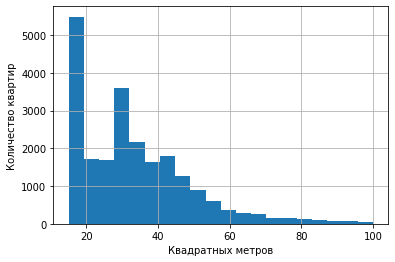

In [20]:
data_new['living_area'].hist(bins=20,range=(15,100))
plt.xlabel('Квадратных метров')
plt.ylabel('Количество квартир')

Глядя на гистограмму можно сделать вывод,что чаще всего встречаются квартиры с квадратурой жилой площади от 20 кв.м. до 30 кв.м. 

Text(0, 0.5, 'Количество квартир')

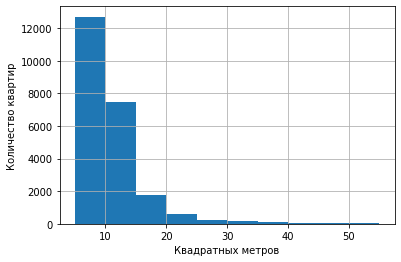

In [21]:
data_new['kitchen_area'].hist(bins=10,range=(5,55))
plt.xlabel('Квадратных метров')
plt.ylabel('Количество квартир')

Глядя на гистограмму,можно сделать вывод,что в основном кухня занимает не более 15 кв.м. Если рассматривать более 20кв.м,то такое практически не встречается, т.к. кухня больших размеров в целом не имеет не обходимости и не пользуется большим спросом.

Text(0, 0.5, 'Количество квартир')

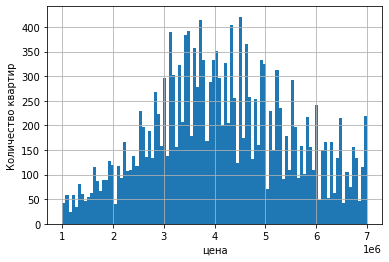

In [22]:
data_new['last_price'].hist(bins=100,range=(1000000,7000000))
plt.xlabel('цена')
plt.ylabel('Количество квартир')

Глядя на гистограмму,можем сделать выводы,что большинство квартир варируются от 3 до 5 миллионов рублей.

Text(0, 0.5, 'Количество квартир')

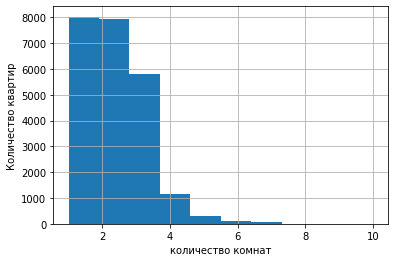

In [23]:
data_new['rooms'].hist(bins=10,range=(1,10))
plt.xlabel('количество комнат')
plt.ylabel('Количество квартир')

Глядя на гистограмму,можно сделать вывод,что большинство квартир покупают 1-3 комнатных. 4 и более комнат нужны либо большим семьям,либо их покупают люди с большим доходом.

Text(0, 0.5, 'Количество квартир')

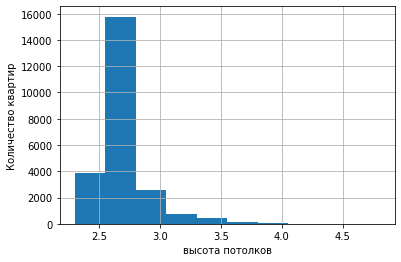

In [24]:
data_new['ceiling_height'].hist(bins=10)
plt.xlabel('высота потолков')
plt.ylabel('Количество квартир')

Глядя на гистограмму можно сделать вывод,что большентсво квартир имеют высоту потолка от 2.5 до 3 метров. Дома с более высокими потолками встречаются значительно реже,возможно более высокие потолки есть в старых домах,которые сейчас не так часто продаются

Text(0, 0.5, 'Количество квартир')

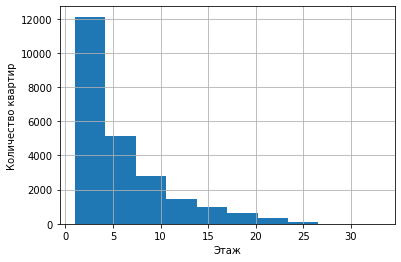

In [25]:
data_new['floor'].hist(bins=10)
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')

Глядя на гистограмму,можно сделать вывод,что чаще всего продаются квартиры на нижних этажах,в частности больше всего с 1 по 5 этаж. Возможно это связано с ценой,возможно с какими-нибудь факторами удобства.

Text(0, 0.5, 'Количество квартир')

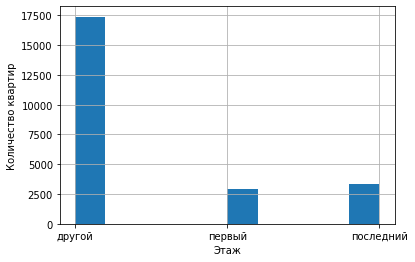

In [26]:
data_new['floor_type'].hist(bins=10)
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')

Глядя на эту гистограмму можно сделать вывод,что первых и последних этажей значительно меньше,чем в категории "другие",если глянуть на предыдущую гистограмму,можно предположить,что в категории другой хорошо пользуются спросом 2,3,4,5 этажи.

Text(0, 0.5, 'Количество квартир')

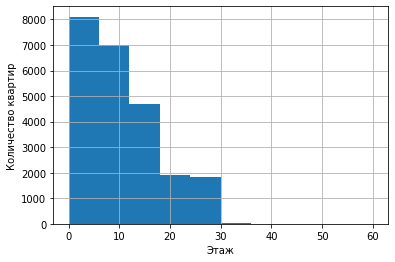

In [27]:
data_new['floors_total'].hist(bins=10)
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')

Глядя на гистограмму,можно сделать вывод,что больше всего квартир продается в 5 и 9 этажках,кол-во новостроеев с более высокой этажностью значительно меньше.

Text(0, 0.5, 'Количество квартир')

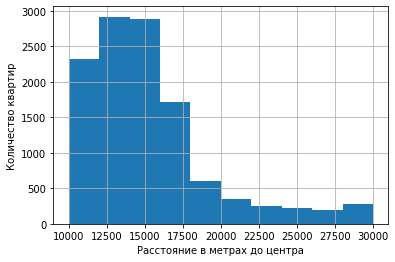

In [28]:
data_new['cityCenters_nearest'].hist(bins=10,range=(10000,30000))
plt.xlabel('Расстояние в метрах до центра')
plt.ylabel('Количество квартир')

Глядя на гистограмму,можно сделать вывод,что большинство квартир находятся в пределах 10-16 км от центра города,что в принципе можно считать средним расстоянием,можно также заметить,что квартиры которые ближе к центру преобладают по отношению к тем,которые находятся дальше 16 км. по моему мнению многим хотелось бы иметь квартиру ближе к центру.

Text(0, 0.5, 'Количество квартир')

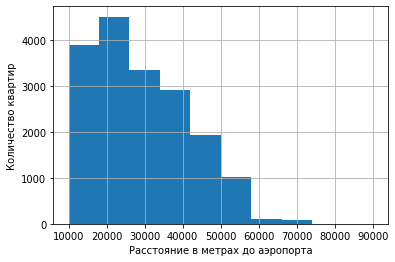

In [29]:
data_new['airports_nearest'].hist(bins=10,range=(10000,90000))
plt.xlabel('Расстояние в метрах до аэропорта')
plt.ylabel('Количество квартир')

Глядя на гистограмму,можно сделать вывод что в большинстве случаев,расстояние до аэропорта 20-30 км,т.к. аэропорт чаще всего назолятся за городом,нет необходимости покупать квартиры поблизости с ним.

Text(0, 0.5, 'Количество квартир')

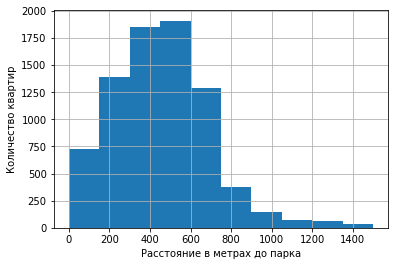

In [30]:
data_new['parks_nearest'].hist(bins=10,range=(0,1500))
plt.xlabel('Расстояние в метрах до парка')
plt.ylabel('Количество квартир')

Глядя на эту гистограмму,можно сказать,что большинство квартир находятся в шаговой доступности от парка.Это логично,сейчас многие дома строят инфраструктуру вместе с ЖК,а если дом и не новый,то все равно есть тенденция к появлению новых парков.

Text(0, 0.5, 'Количество квартир')

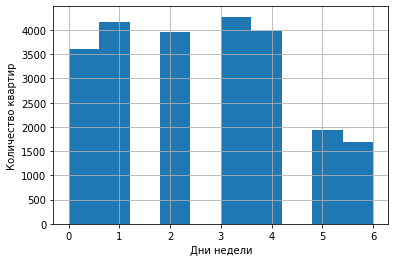

In [31]:
data_new['first_day_weekday'] = data_new['first_day_exposition'].dt.weekday
data_new['first_day_weekday'].hist()
plt.xlabel('Дни недели')
plt.ylabel('Количество квартир')

Глядя на гистограмму,можно сделать вывод что в будние дни публикации по продаже квартир осуществляются активнее,чем в выходные дни

Text(0, 0.5, 'Количество квартир')

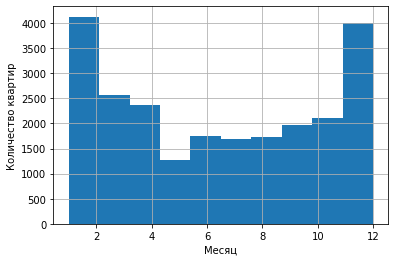

In [32]:
data_new['first_day_month'] = data_new['first_day_exposition'].dt.month
data_new['first_day_month'].hist()
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')

Глядя на гистограмму,можно сделать вывод,что сезонность продажи квартир приходится на зиму,в первый и второй месяцы года выставляется больше всего объявлений, в начале года и в конце года,далее в среднем кол-во +- одинаковое,есть небольшая просадка в конце весны\начале лета.

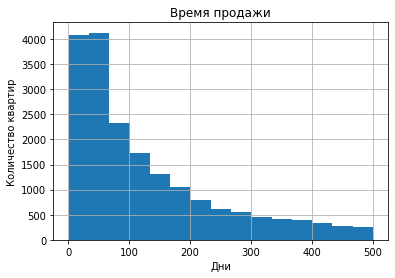

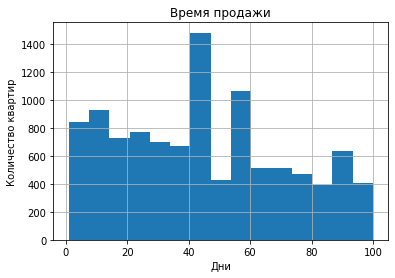

In [33]:
data_new['days_exposition'].hist(bins=15,range=(1,500))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

data_new['days_exposition'].hist(bins=15,range=(1,100))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

In [34]:
print('медианное значение', data_new['days_exposition'].median())
print('среднее значение', data_new['days_exposition'].mean())
data_new['days_exposition'].describe()

медианное значение 95.0
среднее значение 180.68945952555637


count   20445.00
mean      180.69
std       219.62
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

# ВЫВОД:


Медианное время продажи - 95 дней. Среднее время продажи - 181 день.
В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 230 дней (7,5 месяцев) и дольше.

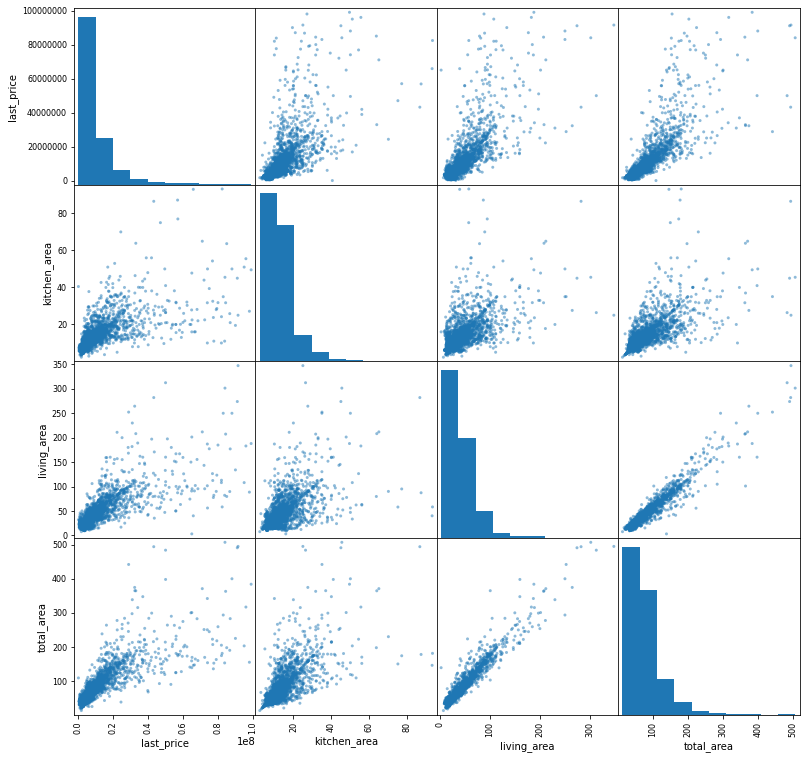

Корреляции цены и общей площади,площади кухни и жилой площади:

              last_price  kitchen_area  living_area  total_area
last_price          1.00          0.66         0.75        0.81
kitchen_area        0.66          1.00         0.58        0.69
living_area         0.75          0.58         1.00        0.96
total_area          0.81          0.69         0.96        1.00


In [35]:
#проверим зависимость цены от площадей (общей,жилой,кухни) с помощью матрицы диаграмм рассеяния
data_new_area = data_new.pivot_table(index='last_price',values=['total_area','living_area','kitchen_area']).reset_index()
pd.plotting.scatter_matrix(data_new_area,figsize=(13,13))
plt.show()
print('Корреляции цены и общей площади,площади кухни и жилой площади:')
print()
print(data_new_area.corr())

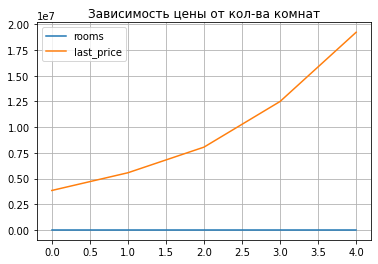

Корреляции цены и кол-ва комнат:

            rooms  last_price
rooms        1.00        0.97
last_price   0.97        1.00


In [36]:
#проверим зависимость цены от кол-ва комнат
data_new_rooms = data_new.query('rooms > 0 and rooms < 6').groupby('rooms')['last_price'].mean().reset_index() #отсекли выбросы в виде 0,так как 0 комнат быть не может,и убрали выброс в 6 комнат
data_new_rooms.plot(title='Зависимость цены от кол-ва комнат',grid=True)
plt.show()
print('Корреляции цены и кол-ва комнат:')
print()
print(data_new_rooms.corr())

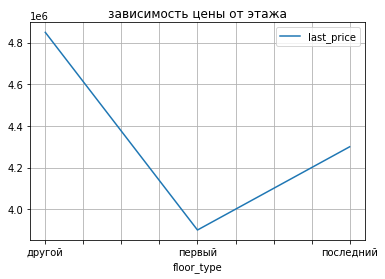

In [37]:
#проверим зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)
data_new_floor = data_new.pivot_table(index='floor_type',values='last_price',aggfunc='median')
data_new_floor.plot(title='зависимость цены от этажа',grid=True)
plt.show()



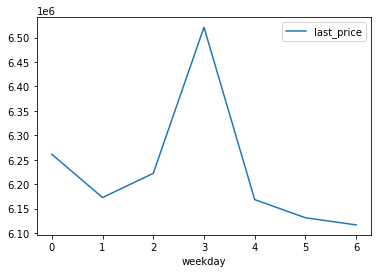

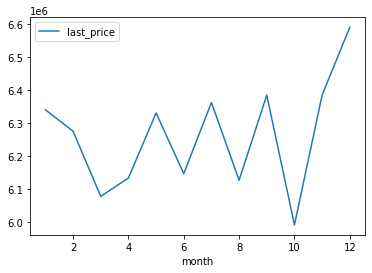

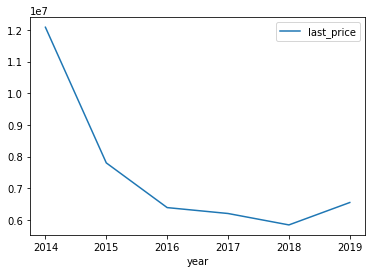

In [38]:
#проверим зависимость цены от дня размещения,месяца и года
data_new_weekday = data_new.pivot_table(index='weekday',values='last_price')
data_new_weekday.plot()
plt.show()

data_new_month = data_new.pivot_table(index='month',values='last_price')
data_new_month.plot()
plt.show()

data_new_year = data_new.pivot_table(index='year',values='last_price')
data_new_year.plot()
plt.show()


# ВЫВОД:

Чем больше площадь, тем выше стоимость до 200 кв.м.,далее разброс становится больше,возможно это связано с расстоянием до центра либо наличие парка рядом,возможно на эти квартиры больший спрос. Корреляция этих параметров  высокая до определенного момента.Корреляция жилой площади влияет на цену,но она ниже,чем общей площади.Корреляция кухни же является значительно ниже,и намного слабее влияет на цену. Число комнат влияет на цену очень сильно(больше комнат - больше цена),  зависимость выше, чем у площади. Можно сделать вывод,что у людей кол-во комнат в приоритете даже над площадью,они могут взять квартиру чуть меньше,но с раздельными комнатами,это в частности актуально для семей с детьми

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

День недели: дороже всего квартиры, опубликованные в среду, дешевле всего - в воскресенье,пик приходится на середину недели,самое продуктивное время
Месяц: дороже всего квартиры, продающиеся с ноября по февраля,возможно это связано с сезонностью, дешевле всего - с сентября по октябрь.
Год: квартиры очень сильно подешевели в 2015-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, т.к. экономика и зарплаты скорее на подъёме.

In [39]:
# Добавляем столбец со стоимостью квадратного метра (m_price) и приводим его в целочисленный тип
data_new['m_price'] = data_new['last_price'] / data_new['total_area']
data_new['m_price'] = data_new['m_price'].astype(int)
data_new['m_price']

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: m_price, Length: 23611, dtype: int64

In [47]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
data_new_top = data_new.pivot_table(index='locality_name', values='m_price', aggfunc=['count', 'mean']).reset_index(level='locality_name')
data_new_top.columns = ['локация', 'количество', 'среднее'] #убрали лишнюю этажность
data_new_top.sort_values(by='количество',ascending=False).head(10)



,локация,количество,среднее
238,Санкт-Петербург,15658,113558.42
163,Мурино,588,86064.36
127,Кудрово,471,95325.73
305,Шушары,440,78676.90
63,Всеволожск,397,68718.85
217,Пушкин,369,103125.37
112,Колпино,338,75424.15
185,Парголово,327,90175.49
70,Гатчина,306,68757.23
64,Выборг,235,58237.72


In [41]:
data_new_top.sort_values(by='среднее',ascending=True)

,локация,количество,среднее
264,Старополье,3,11206.00
242,Свирь,2,11481.00
54,Вахнова Кара,1,11688.00
65,Выскатка,2,12335.00
256,Совхозный,2,12628.50
...,...,...,...
251,Сестрорецк,183,101757.16
217,Пушкин,369,103125.37
228,Репино,4,104238.50
238,Санкт-Петербург,15658,113558.42


# Вывод
Наибольшая средняя стоимость  квадратного метра по кол-ву объявлений как и ожидалось, в Санкт-Петербурге. Из топ-10 наименьшая стоимость и всего лишь одно объявление в городке 'Вахнова Кара'.


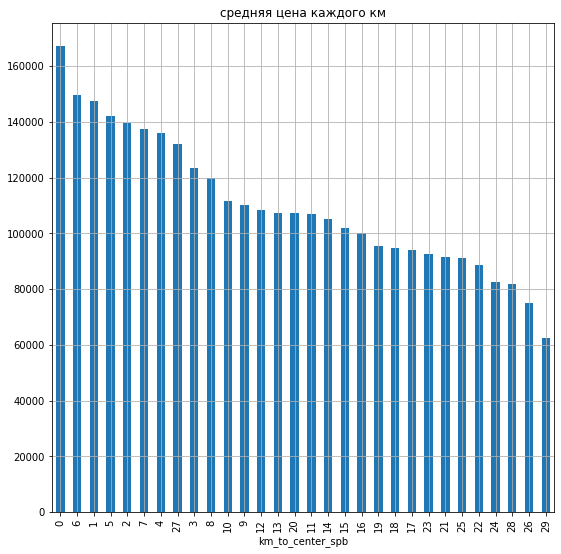

In [42]:
#возьмем выборку по СПБ
data_new_spb = data_new.loc[(data_new['locality_name'] == 'Санкт-Петербург')]

#добавляем новый столбец с расстоянием в км до центра питера
data_new_spb['km_to_center_spb'] = data_new_spb['cityCenters_nearest'] / 1000

#заменим пропуски и приведем к целочисленному виду 
data_new_spb['km_to_center_spb'] = data_new_spb['km_to_center_spb'].fillna(0).astype(int)

#проверим уникальные значения
#возьмем выборку по СПБ
data_new_spb = data_new.loc[(data_new['locality_name'] == 'Санкт-Петербург')]

#добавляем новый столбец с расстоянием в км до центра питера
data_new_spb['km_to_center_spb'] = data_new_spb['cityCenters_nearest'] / 1000

#заменим пропуски и приведем к целочисленному виду 
data_new_spb['km_to_center_spb'] = data_new_spb['km_to_center_spb'].fillna(0).astype(int)

#проверим уникальные значения
data_new_spb['km_to_center_spb'].unique()

#посчитаем цену одного кв.метра в спб и добавим в новый столбец
data_new_spb['price_1m_spb'] = data_new_spb['last_price'] / data_new_spb['total_area']

#вычислим среднюю цену каждого км

mean_km = data_new_spb.groupby('km_to_center_spb')['price_1m_spb'].mean().sort_values(ascending=False)
mean_km.plot(title='средняя цена каждого км', grid=True,kind='bar',figsize=(9,9))
plt.show()

# Вывод
Глядя на график можно увидеть что средняя цена за кв.м. очень высокая у квартир,которые находятся в пределах 10 км от центра. Дальше 10 км средняя цена на квартиры постепенно снижается.Есть выброс на 27 км,это может означать,что возможно там продается какая-нибудь элитная недвижимость,где нибудь в пригороде
Мы видим,что чем дальше квартира от центра,тем меньше ее цена,люди стараются брать жилье ближе к центру по разным причинам,в основном можно предположить это связано непосредственно с их трудовой деятельностью,так как элементарно проще и быстрее добираться до работы. Так же ближе к центру больше развита инфраструктура и различные сервисы и меньше тратить времени на дорогу

### Общий вывод

#### Срок продажи квартиры

Чаще всего квартиру продают за 95 дней. 
Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.



#### Факторы, влияющие на стоимость

На стоимость больше влияет кол-во комнат квартиры,но и так же сильно влияет площадь. Т.е. квартиры с большим кол-во комнат в приоритете,люди могут немного даже убрать приоритет с площади,возможно для того,что бы у их детей была например своя комната.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

#### Стоимость квадратного метра в топ-10 населённых пунктов

Больше всего объявлений в Санкт-Петербурге - 15658, там же и дороже всего квадратный метр  - 113558

Дешевле всего квадратный метр  на количество объявлений,всего лишь одно в Вахновой Каре - 11688